In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./StudentsPerformance.csv")

In [3]:
df_copy = df.copy()

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df_num = df.select_dtypes(include='number')
df_cat = df.select_dtypes(include=['object','category'])

In [6]:
df.sample(10).style.background_gradient(cmap='Pastel2')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
614,female,group A,associate's degree,standard,none,82,93,93
621,male,group B,bachelor's degree,free/reduced,none,62,63,56
718,female,group C,high school,standard,none,76,76,74
41,female,group C,associate's degree,standard,none,58,73,68
647,female,group E,high school,free/reduced,none,64,62,68
874,female,group C,bachelor's degree,free/reduced,none,43,62,61
469,male,group C,some college,standard,none,91,74,76
231,male,group C,associate's degree,standard,none,46,43,42
109,female,group B,some high school,standard,none,70,64,72
610,male,group D,some college,free/reduced,completed,69,60,63


In [7]:
df.shape

(1000, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.size

8000

In [10]:
df['total_perc'] = round((df['reading score'] + df['writing score'] + 
                   df['math score'])/3, 2)

In [11]:
df['total_perc']

0      72.67
1      82.33
2      92.67
3      49.33
4      76.33
       ...  
995    94.00
996    57.33
997    65.00
998    74.33
999    83.00
Name: total_perc, Length: 1000, dtype: float64

In [12]:
df['total_Marks'] = df['reading score'] + df['writing score'] + df['math score']

In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_perc,total_Marks
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,218
1,female,group C,some college,standard,completed,69,90,88,82.33,247
2,female,group B,master's degree,standard,none,90,95,93,92.67,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,148
4,male,group C,some college,standard,none,76,78,75,76.33,229


In [14]:
df['total_perc'].describe()

count    1000.000000
mean       67.770580
std        14.257311
min         9.000000
25%        58.330000
50%        68.330000
75%        77.670000
max       100.000000
Name: total_perc, dtype: float64

In [15]:
corr_target = df.corrwith(df['total_perc'])
corr_target

math score       0.918744
reading score    0.970331
writing score    0.965669
total_perc       1.000000
total_Marks      1.000000
dtype: float64

In [16]:
def Grade(total_perc):
    if total_perc > 85 : return "A"
    if total_perc > 71 : return "B"
    if total_perc > 61 : return "C"
    if total_perc > 50 : return "D"
    else: return "F"
    
df['Grade'] = df['total_perc'].apply(lambda x:Grade(x))    

In [17]:
df['Grade']

0      B
1      B
2      A
3      F
4      B
      ..
995    A
996    D
997    C
998    B
999    B
Name: Grade, Length: 1000, dtype: object

In [18]:
passmark = 50

In [19]:
df['math_passstatus'] = np.where(df['math score'] < passmark, 'F','P')
df['reading_passstatus'] = np.where(df['reading score'] < passmark, 'F','P')
df['writing_passstatus'] = np.where(df['writing score'] < passmark, 'F','P')

In [20]:
df['perc_passstatus'] = np.where(df['total_perc']<passmark, 'F','P')

In [21]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_perc,total_Marks,Grade,math_passstatus,reading_passstatus,writing_passstatus,perc_passstatus
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,218,B,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,82.33,247,B,P,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,92.67,278,A,P,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,148,F,F,P,F,F
4,male,group C,some college,standard,none,76,78,75,76.33,229,B,P,P,P,P


<AxesSubplot:ylabel='gender'>

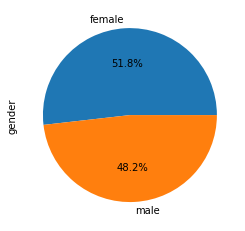

In [22]:
df.gender.value_counts().plot(kind='pie', autopct='%1.1f%%')

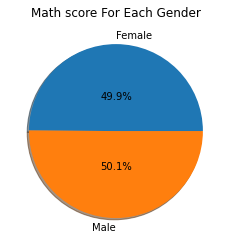

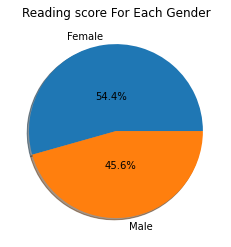

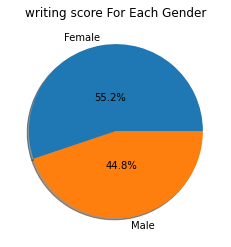

In [23]:
x = df.groupby('gender')['math score'].sum()
plt.pie(x, autopct='%1.1f%%', labels=['Female','Male'], shadow=True,pctdistance=0.4)
plt.title('Math score For Each Gender')
plt.show()
x = df.groupby('gender')['reading score'].sum()
plt.pie(x, autopct='%1.1f%%', labels=['Female','Male'], shadow=True,pctdistance=0.4)
plt.title('Reading score For Each Gender')
plt.show()
x = df.groupby('gender')['writing score'].sum()
plt.pie(x, autopct='%1.1f%%', labels=['Female','Male'], shadow=True,pctdistance=0.4)
plt.title('writing score For Each Gender')
plt.show()

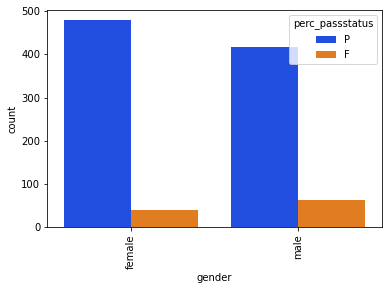

In [24]:
p = sns.countplot(x='gender', data=df, hue='perc_passstatus',
                 palette='bright')
_ = plt.setp(p.get_xticklabels(),rotation=90)

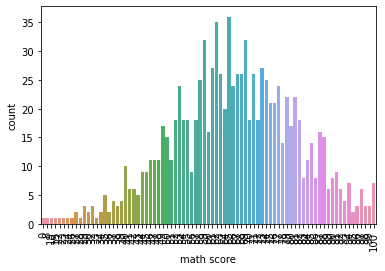

In [25]:
p = sns.countplot(x='math score', data=df)
_ = plt.setp(p.get_xticklabels(), rotation=90,)

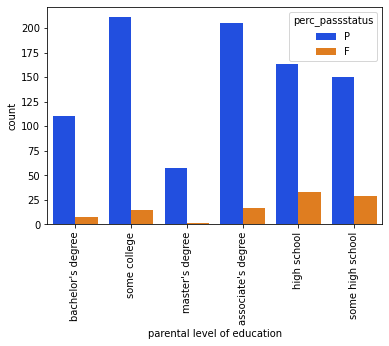

In [26]:
p = sns.countplot(x='parental level of education', data=df,
                 hue='perc_passstatus', palette='bright')
_ = plt.setp(p.get_xticklabels(),rotation=90)

<AxesSubplot:ylabel='lunch'>

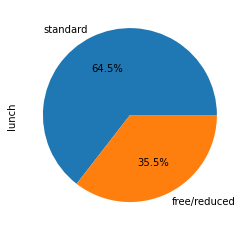

In [27]:
df.lunch.value_counts().plot(kind='pie',autopct='%1.1f%%')

In [28]:
df.pivot_table(values=['math score', 'reading score', 'writing score'],index='gender').reset_index()

,gender,math score,reading score,writing score
0,female,63.633205,72.608108,72.467181
1,male,68.728216,65.473029,63.311203


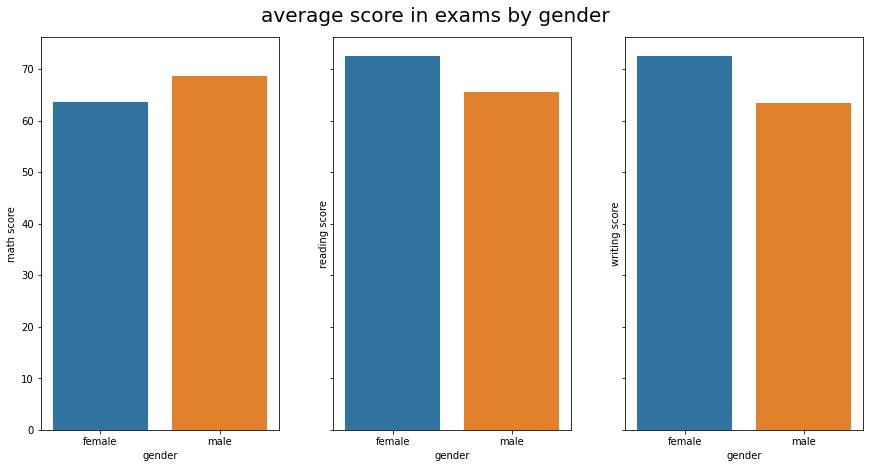

In [29]:
fig, axes=plt.subplots(1,3, sharey=True, figsize=(13,7))
sns.barplot(ax=axes[0],x='gender',y='math score',data=df,ci=None)
sns.barplot(ax=axes[1],x='gender',y='reading score',data=df,ci=None)
sns.barplot(ax=axes[2],x='gender',y='writing score',data=df,ci=None)
plt.tight_layout(pad=4.0)
fig.suptitle('average score in exams by gender', fontsize=20)
plt.show()

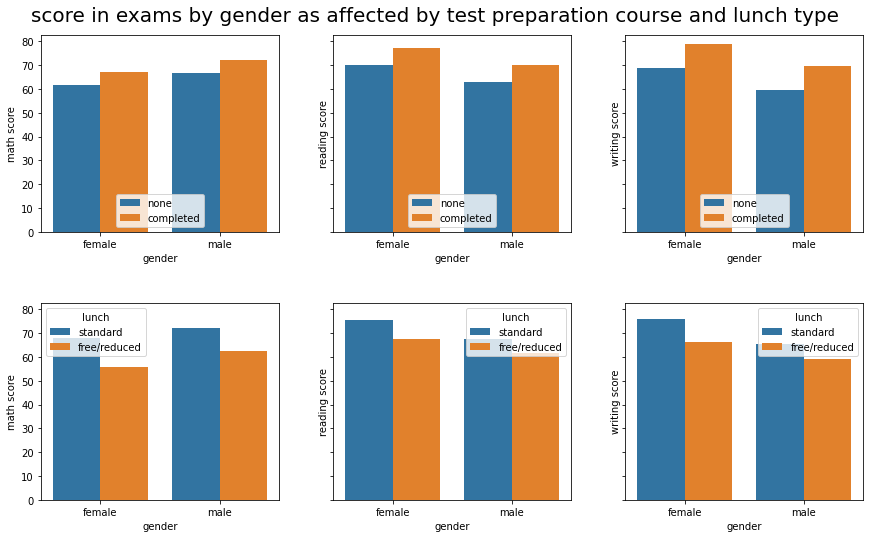

In [30]:
fig, axes =plt.subplots(2,3,sharey=True, figsize=(13,8))
sns.barplot(ax=axes[0,0], x='gender',y='math score', data=df,
           hue='test preparation course', ci=None)
sns.barplot(ax=axes[0,1], x='gender',y='reading score', data=df,
           hue='test preparation course', ci=None)
sns.barplot(ax=axes[0,2], x='gender',y='writing score', data=df,
           hue='test preparation course', ci=None)


sns.barplot(ax=axes[1,0], x='gender',y='math score', data=df,
           hue='lunch', ci=None)
sns.barplot(ax=axes[1,1], x='gender',y='reading score', data=df,
           hue='lunch', ci=None)
sns.barplot(ax=axes[1,2], x='gender',y='writing score', data=df,
           hue='lunch', ci=None)


plt.tight_layout(pad=4.0)
fig.suptitle('score in exams by gender as affected by test preparation course and lunch type', fontsize=20)
axes[0,0].legend(loc='lower center')
axes[0,1].legend(loc='lower center')
axes[0,2].legend(loc='lower center')
axes[0,0].legend(loc='lower center')
axes[0,1].legend(loc='lower center')
axes[0,2].legend(loc='lower center')
plt.show()

<AxesSubplot:>

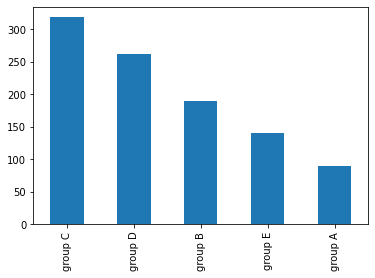

In [31]:
df['race/ethnicity'].value_counts().sort_values(ascending=False).plot(kind='bar')

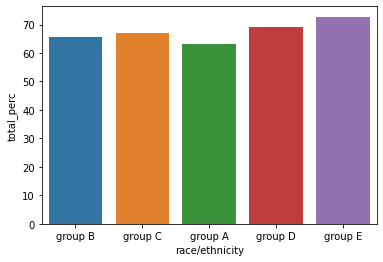

In [32]:
x = df.pivot_table(values='total_perc', index='race/ethnicity').reset_index()
sns.barplot(x='race/ethnicity',y='total_perc',data=df,ci=None)
plt.show()

In [33]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_perc,total_Marks,Grade,math_passstatus,reading_passstatus,writing_passstatus,perc_passstatus
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,218,B,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,82.33,247,B,P,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,92.67,278,A,P,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,148,F,F,P,F,F
4,male,group C,some college,standard,none,76,78,75,76.33,229,B,P,P,P,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00,282,A,P,P,P,P
996,male,group C,high school,free/reduced,none,62,55,55,57.33,172,D,P,P,P,P
997,female,group C,high school,free/reduced,completed,59,71,65,65.00,195,C,P,P,P,P
998,female,group D,some college,standard,completed,68,78,77,74.33,223,B,P,P,P,P


In [34]:
df.isnull().sum().sort_values(ascending=False)
df.isna().sum().sort_values(ascending=False)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
total_perc                     0
total_Marks                    0
Grade                          0
math_passstatus                0
reading_passstatus             0
writing_passstatus             0
perc_passstatus                0
dtype: int64

In [35]:
df.duplicated().sum()

0

### Converting Categorical Features 
- To predict the total marks of any student in the table we need to take into consideration all the columns.
- So lets convert the categorical data columns into numerical ones by using get_dummies function

In [36]:
df1 = pd.get_dummies(df[df.columns[:5]], drop_first=True)
df1.head()

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0,1,0,0,0,1,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,1,0,1,1


Creating final dataframe so as train the model

In [37]:
df.drop(['gender','race/ethnicity','parental level of education', 'lunch',
        'test preparation course','total_perc','Grade','math_passstatus','reading_passstatus','writing_passstatus','perc_passstatus'], axis=1, inplace=True)
df = pd.concat([df1,df], axis=1)
df.head()

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,math score,reading score,writing score,total_Marks
0,0,1,0,0,0,1,0,0,0,0,1,1,72,72,74,218
1,0,0,1,0,0,0,0,0,1,0,1,0,69,90,88,247
2,0,1,0,0,0,0,0,1,0,0,1,1,90,95,93,278
3,1,0,0,0,0,0,0,0,0,0,0,1,47,57,44,148
4,1,0,1,0,0,0,0,0,1,0,1,1,76,78,75,229


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   gender_male                                    1000 non-null   uint8
 1   race/ethnicity_group B                         1000 non-null   uint8
 2   race/ethnicity_group C                         1000 non-null   uint8
 3   race/ethnicity_group D                         1000 non-null   uint8
 4   race/ethnicity_group E                         1000 non-null   uint8
 5   parental level of education_bachelor's degree  1000 non-null   uint8
 6   parental level of education_high school        1000 non-null   uint8
 7   parental level of education_master's degree    1000 non-null   uint8
 8   parental level of education_some college       1000 non-null   uint8
 9   parental level of education_some high school   1000 non-null   uint8
 10  l

### Builing a Linear Regression model

**Train Test Split**

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['total_Marks'], axis=1), 
                                                    df['total_Marks'], test_size=0.3,
                                                    random_state=101)

**Training and Predicting**

In [40]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)
predictions=LR.predict(X_test)

Lets visualize prediction against the testing data

<AxesSubplot:xlabel='total_Marks'>

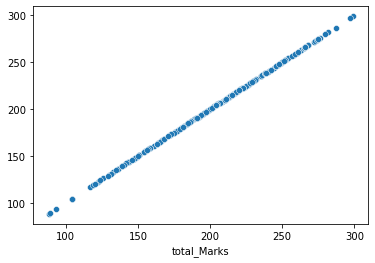

In [41]:
sns.scatterplot(x=y_test, y=predictions)

Well as above plot shows model fits very well and showing that the reg score is almost equal to 1, but still we can evaluate the model by the help of the cost functions


So lets import them and evaluate model 

In [43]:
from sklearn import metrics
print('The Mean absolute error: ',metrics.mean_absolute_error(y_test,
                                                             predictions))
print('The mean squared error: ',metrics.mean_squared_error(y_test,predictions))
print('The mean squared error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

The Mean absolute error:  1.9847827085565466e-14
The mean squared error:  8.030814378057959e-28
The mean squared error:  2.8338691533057694e-14


Prettey well! That shows our model is best fitted on the given dataset

### Lets create models to predict the math score, reading score and writing score and compare the result

In [ ]:
df.drop('total_Marks', axis=1, inplace=True)

for i in ['math score', 'reading score','writing score']:
    X_train, X_test, y_train, y_test = train_